# Introductory applied machine learning
# Assignment 4: Unsupervised Learning Part B (PCA) [50%]

## Important Instructions

**It is important that you follow the instructions below to the letter - we will not be responsible for incorrect marking due to non-standard practices.**

1. <font color='red'>We have split Assignment 4 into two parts to make it easier for you to work on them separately and for the markers to give you feedback. This is part B of Assignment 4 and deals with the MNIST Dataset - Part A deals with the 20 Newsgroup dataset. Both Assignments together are still worth 50% of CourseWork 2. **Remember to submit both notebooks (you can submit them separately).**</font>

1. You *MUST* have your environment set up as in the [README](https://github.com/michael-camilleri/IAML2018) and you *must activate this environment before running this notebook*:
```
source activate py3iaml
cd [DIRECTORY CONTAINING GIT REPOSITORY]
jupyter notebook
# Navigate to this file
```

1. Read the instructions carefully, especially where asked to name variables with a specific name. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers. In most cases we indicate the nature of answer we are expecting (code/text), and also provide the code/markdown cell where to put it

1. There are some questions which are **specific to those taking the Level-11 version** of the course (INFR11182 and INFR11152). These are clearly marked with the words **(LEVEL 11)** and must be completed by those taking the Level 11 course. Those on the Level 10 version (INFR10069) may (and are advised to) attempt such questions but this will not affect their mark in any way, nor will they get feedback on them.

1. The .csv files that you will be using are located at `./datasets` (i.e. use the `datasets` directory **adjacent** to this file).

1. Keep your answers brief and concise. Most written questions can be answered with 2-3 lines of explanation: **in questions where this is specified, you will be penalised if you go over.**

1. Make sure to distinguish between **attributes** (columns of the data) and **features** (which typically refers only to the independent variables, i.e. excluding the target variables).

1. Make sure to show **all** your code/working. 

1. Write readable code. While we do not expect you to follow [PEP8](https://www.python.org/dev/peps/pep-0008/) to the letter, the code should be adequately understandable, with plots/visualisations correctly labelled. **Do** use inline comments when doing something non-standard. When asked to present numerical values, make sure to represent real numbers in the appropriate precision to exemplify your answer. Marks *WILL* be deducted if the marker cannot understand your logic/results.

1. **Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you must NOT borrow actual text or code from others. We ask that you provide a list of the people who you've had discussions with (if any). Please refer to the [Academic Misconduct](http://web.inf.ed.ac.uk/infweb/admin/policies/academic-misconduct) page for what consistutes a breach of the above.

### SUBMISSION Mechanics

**IMPORTANT:** You must submit this assignment by **Thursday 15/11/2018 at 16:00**. 

**Late submissions:** The policy stated in the School of Informatics is that normally you will not be allowed to submit coursework late. See the [ITO webpage](http://web.inf.ed.ac.uk/infweb/student-services/ito/admin/coursework-projects/late-coursework-extension-requests) for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Resubmission:** If you submit your file(s) again, the previous submission is **overwritten**. We will mark the version that is in the submission folder at the deadline.

**N.B.**: This Assignment requires submitting **two files (electronically as described below)**:
 1. The Jupyter Notebook for Part A, *and*
 1. This Jupyter Notebook for Part B
 
All submissions happen electronically. To submit:
1. Fill out this notebook (as well as Part A), making sure to:
   1. save it with **all code/text and visualisations**: markers are NOT expected to run any cells,
   1. keep the name of the file **UNCHANGED**, *and*
   1. **keep the same structure**: retain the questions, **DO NOT** delete any cells and **avoid** adding unnecessary cells unless absolutely necessary, as this makes the job harder for the markers.

1. Submit it using the `submit` functionality. To do this, you must be on a DICE environment. Open a Terminal, and:
   1. **On-Campus Students**: navigate to the location of this notebook and execute the following command:
   
      ```submit iaml cw2 04_A_KMeans.ipynb 04_B_PCA.ipynb```
      
   1. **Distance Learners:** These instructions also apply to those students who work on their own computer. First you need to copy your work onto DICE (so that you can use the `submit` command). For this, you can use `scp` or `rsync` (you may need to install these yourself). You can copy files to `student.ssh.inf.ed.ac.uk`, then ssh into it in order to submit. The following is an example. Replace entries in `[square brackets]` with your specific details: i.e. if your student number is for example s1234567, then `[YOUR USERNAME]` becomes `s1234567`.
   
    ```
    scp -r [FULL PATH TO 04_A_KMeans.ipynb] [YOUR USERNAME]@student.ssh.inf.ed.ac.uk:04_A_KMeans.ipynb
    scp -r [FULL PATH TO 04_B_PCA.ipynb] [YOUR USERNAME]@student.ssh.inf.ed.ac.uk:04_B_PCA.ipynb
    ssh [YOUR USERNAME]@student.ssh.inf.ed.ac.uk
    ssh student.login
    submit iaml cw2 04_A_KMeans.ipynb 04_B_PCA.ipynb
    ```
    
   What actually happens in the background is that your file is placed in a folder available to markers. If you submit a file with the same name into the same location, **it will *overwrite* your previous submission**. You should receive an automatic email confirmation after submission.
  

### Marking Breakdown

The Level 10 and Level 11 points are marked out of different totals, however these are all normalised to 100%. Both Part A and Part B (this notebook) are each worth 50% of the Total Mark for Assignment 4.

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

Note that while this is not a programming assignment, in questions which involve visualisation of results and/or long cold snippets, some marks may be deducted if the code is not adequately readable.

## Imports

Use the cell below to include any imports you deem necessary.

In [1]:
%matplotlib inline
%pylab inline

# Nice Formatting within Jupyter Notebook
%matplotlib inline
from IPython.display import display # Allows multiple displays from a single code-cell

# For Getting the Data
from sklearn.datasets import fetch_20newsgroups, load_digits
from sklearn.feature_extraction.text import TfidfVectorizer

# System functionality
import sys
sys.path.append('..')

# Import Here any Additional modules you use. To import utilities we provide, use something like:
#   from utils.plotter import plot_hinton

# Your Code goes here:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

Populating the interactive namespace from numpy and matplotlib


## Description of the dataset

In this part of the assignment we will explore the MNIST digits dataset. We expect the digits to lie in a lower-dimensional manifold and want to examine the representation we get by applying Principal Components Analysis (PCA). PCA maps the data into a new space by effectively rotating the base vectors of the input space to the directions with the highest variance.

### Description of the Data

This MNIST Dataset is a collection of handwritten digits. The samples are partitioned (nearly) evenly across the 10 different digit classes {0, 1, . . . , 9}. We use a preprocessed version for which the data are $8 \times 8$ pixel images containing one digit each. For further details on how the digits are preprocessed, see the sklearn documentation. The images are grayscale, with each pixel taking values in {0, 1, . . . , 16}, where 0 corresponds to black (weakest intensity) and 16 corresponds to white (strongest intensity). Therefore, the dataset is a N × 64
dimensional matrix where each dimension corresponds to a pixel from the image and N is the number of
images. 

Again, to save you time, we perfom the import for you.

## 1. Exploration of the dataset

As in part A, we will automatically download the data we will be using. Execute the cell below, which will download the data, and also output a textual description of the dataset, which you should read. The more interested reader may also look at the official [documentation](http://yann.lecun.com/exdb/mnist/) (note that this is a preprocessed version of the original dataset mentioned in that link).

**Do not change any of the code in this cell.**

In [2]:
digits = load_digits()
print(digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

### ========== Question 1.1 --- [9 marks] ==========

Let us start by familiarising ourselves with the dataset. Note that digits is a python `dict`: we have already used one of its entries (`DESCR`) to get the description above. If you execute `digits.keys()`, you'll see another 4 fields. We will focus our analysis on the `data` and `target` arrays. Occasionally, it may be useful to refer to the `images` field, which is the same as `data` but reshaped to 8x8 images rather than flattened.

&nbsp;&nbsp;**(a)** [Code] Using suitable pandas/numpy methods, summarise the key properties of the `data` and `target` arrays. This should be no more than a few lines of code. *Hint: you may find it helpful to transform the `data` to a Pandas DataFrame.*<br>
&nbsp;&nbsp;**(b)** [Text] Comment on your observations from ***(a)*** (dimensionality, data ranges, anything out of the ordinary). (<5 sentences)<br>

In [3]:
#(a) # Your Code goes here:
display(digits.keys())
data = pd.DataFrame(data=digits.data)
target = digits.target

display(data.shape)
display(data.describe())
display("Data range: [{}, {}]".format(data.describe().loc['min'].min(), data.describe().loc['max'].max()))
display(target.shape)
display(np.unique(target))

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

(1797, 64)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


'Data range: [0.0, 16.0]'

(1797,)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

(b) ***Your answer goes here:***
<br> The 'data' array has a dimensionality of 1797 $\times$ 64, indicating there are 1797 instances (images) with 64 attributes (pixels) each. Values ranges from 0 to 16. From the table, we could spot that most coloums have maximum and minimum values in acceptable range (min > q1 - 1.5 $\times$ iqr, max < q3 + 1.5 $\times$ iqr, min > mean - 3 $\times$ std, max < mean + 3 $\times$ std), which means the possibility of the existence of outliers is low.
<br> The 'target' array is a 1D array with 1797 entries, where values are the number represented by the correpsonding image in the 'data' array. Values are digits from 0 to 9.

### ========== Question 1.2 --- [12 marks] ==========

In order to better interpret the values, we will analyse the standard deviation of the data.

&nbsp;&nbsp;**(a)** [Code] Compute the Standard Deviation over the entire mnist dataset as well as on a per-digit basis. Plot the standard-deviations as 8x8 images (you can use `sns.heatmap()`). *Hint: you may find Pandas' [grouping](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) functionality useful.*<br>
&nbsp;&nbsp;**(b)** [Text] Bearing in mind the way in which PCA reduces dimensionality, comment on the relative importance of the 64 dimensions with respect to PCA dimensionality reduction. (1 sentence)<br>
&nbsp;&nbsp;**(c)** [Text] Does the level of standard deviation indicate whether a dimension is important or not for classification? Explain. (4-5 sentences) *Hint: It may be useful to refer to both the global as well as the per-digit visualisations.*

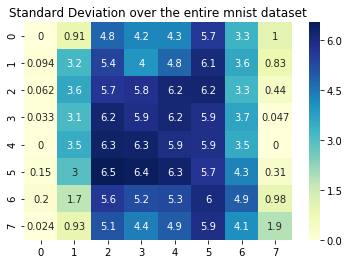

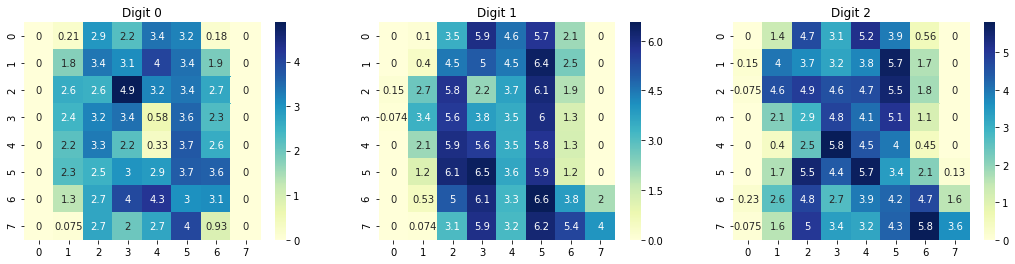

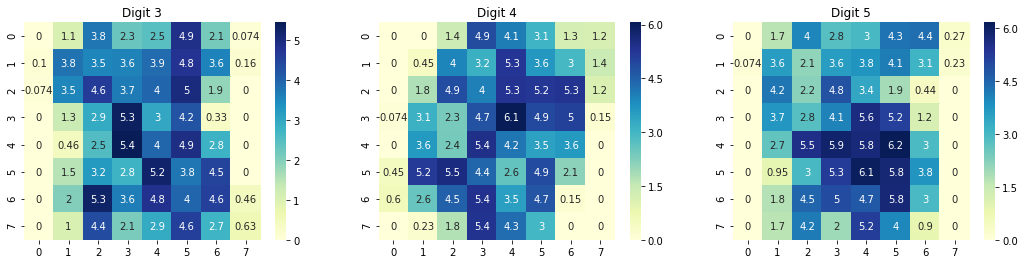

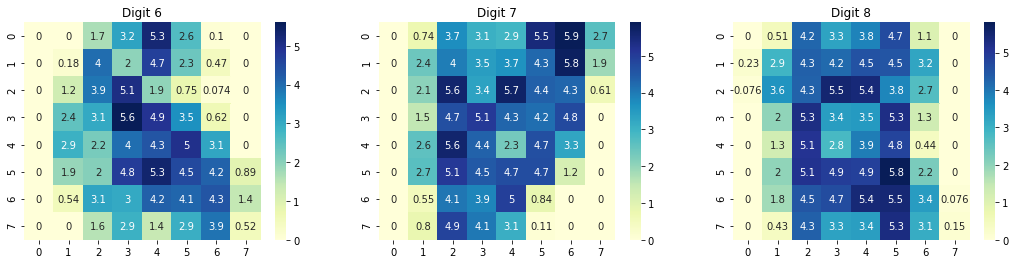

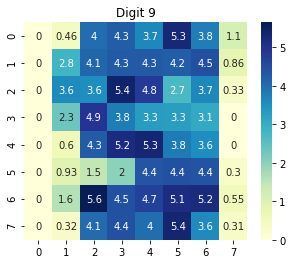

In [4]:
#(a) # Your Code goes here:
plt1 = plt.plot(figsize=(5, 5))
plt1 = sns.heatmap(data=np.array(data).std(0).reshape(8, 8), annot=True, cmap="YlGnBu")
plt1.set_title('Standard Deviation over the entire mnist dataset')
plt.show()

stds = np.array(data.groupby(target).std())
for i in range(0, 3):
    fig = plt.subplots(1, 3, figsize=(18, 4))
    plt2 = plt.subplot(131)
    plt2 = sns.heatmap(data=stds[3 * i].reshape(8,8), annot=True, cmap="YlGnBu")
    plt2.set_title('Digit {}'.format(3 * i))
    
    plt3 = plt.subplot(132)
    plt3 = sns.heatmap(data=stds[3 * i + 1].reshape(8,8), annot=True, cmap="YlGnBu")
    plt3.set_title('Digit {}'.format(3 * i + 1))
    
    plt4 = plt.subplot(133)
    plt4 = sns.heatmap(data=stds[3 * i + 2].reshape(8,8), annot=True, cmap="YlGnBu")
    plt4.set_title('Digit {}'.format(3 * i + 2))
    
    plt.show()

plt5 = plt.figure(figsize=(5,4))
plt5 = sns.heatmap(data=stds[9].reshape(8, 8), annot=True, cmap="YlGnBu")
plt5.set_title('Digit {}'.format(9))
plt.show()


#plt1 = sns.heatmap(data=data, cmap="YlGnBu", annot=True)
#plt.show()

(b) ***Your answer goes here:***
<br> Attributes on the left and right edges of the graph are much less important, due to the zero values (some with small values) of the standard deviation (attributes cannot have negative values, hence zero mean indicates zero variance).

(c) ***Your answer goes here:***
<br> The level of global standard deviation does indicate the importance of a dimension for classification global, but per-digit does not.
<br> Global: The level of standard deviation indicates how sparsely the data distributes on a certain dimension, and the greater the standard deviation is, the greater the distances between the points are and hence easier to separate the points. Therefore, pixels with greater standard deviation value are more significant for classification.
<br> Per-digit: From the graphs, we could spot that by joining the pixels with standard deviation values lying in the middle of the range, the shape produced would vaguely describe the contour for that particular digit. However, the level of the standard deviation would not indicate the importance of a dimension for classification, since the a pixel in a digit would have the same or similar standard deviation value in another digit, making no contribution to separating them.

## 2. Dimensionality Reduction

### ========== Question 2.1 --- [16 marks] ==========

Let us visualise the explained variance by the PCA components. Familiarise yourself with the [PCA](http://scikit-learn.org/0.19/modules/generated/sklearn.decomposition.PCA.html) class in SKLearn.

&nbsp;&nbsp;**(a)** [Code] Using SKLearn's `PCA` object, transform the MNIST `data` into orthogonal (PCA) components, retaining **all** dimensions (set `n_components` appropriately). Set `svd_solver='full'` and keep all other parameters at default values. Then plot the *percentage* variance explained by each dimension as a `bar`-graph, in descending order of variance. *Hint: see the `explained_variance_ratio_` attribute of the PCA object.* On the same graph, plot (line) the cumululative explained variance as you add components (again in descending order of variance explained). Indicate the point at which 80% of the variance is explained (e.g. using matplotlib's [`vlines()`](https://matplotlib.org/2.2.3/api/_as_gen/matplotlib.pyplot.vlines.html)): label the number of components at this point (e.g. in the Legend). Make sure to distinguish between the plots and label them appropriately.<br>&nbsp;&nbsp;*Tip: you may need to use [`twinx()`](https://matplotlib.org/2.2.3/gallery/api/two_scales.html#sphx-glr-gallery-api-two-scales-py) to better combine the two plots. Also, for consistency, number components starting from 0.* <br>
&nbsp;&nbsp;**(b)** [Text] By commenting on the shape of the plot, why do you think 80% of the variance seems like a reasonable threshold? *Hint: Think about why we do PCA*. (<3 sentences)<br>
&nbsp;&nbsp;**(c)** [Text] What can you say about the number of components required to explain 80% of the variance? (<4 sentences)

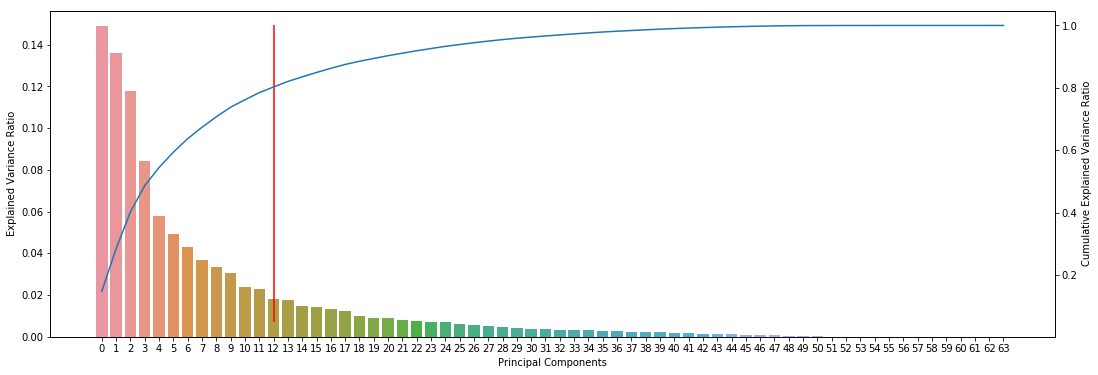

In [5]:
#(a) # Your Code goes here:
pca = PCA(n_components=64, svd_solver='full')
pca.fit(X=data)
var_per = pca.explained_variance_ratio_

# Calculate the cumulative array and the threshold
var_per_cum = np.zeros(64)
var_per_cum[0] = var_per[0]
line80 = 0
for i in range(1, 64):
    var_per_cum[i] = var_per[i] + var_per_cum[i - 1]
    if var_per_cum[i] / 1 >= 0.8:
        if line80 == 0:
            line80 = i


plt6 = plt.figure(figsize=(18, 6))
plt6 = sns.barplot(x=np.arange(0, 64), y=var_per)
plt6.set_xlabel('Principal Components')
plt6.set_ylabel('Explained Variance Ratio')
plt7 = plt6.twinx()
plt7 = plt.plot(var_per_cum)
plt.ylabel('Cumulative Explained Variance Ratio')
plt8 = plt.vlines(x=line80, ymax=1, ymin=0.05, colors='Red')
plt.show()

(b) ***Your answer goes here:***
<br> The gradient of the cumulative explained variance ratio line (blue line) is quite flat at the threshold point and the values for the bars after the threshold are quite small, both indicating that the components after the threshold are not important, indirectly and directly. Also, 80% in general sounds like a reasonable term.

(c) ***Your answer goes here:***
<br> The threshold is at the 12th principal component, meaning the first 13 principal components are enough to explain 80% of the variance. The dimensions reduced from 64 to 13, which is a great reduction (20%), indicating vastly decrease in time consumption and effect of noise when manipulating with the data. Applying PCA to this data would pose a positive effect on classification.

### ========== Question 2.2 --- [10 marks] ==========

Let us attempt to visualise the Principal Components.

&nbsp;&nbsp;**(a)** [Code] Use heatmap (set `cmap='binary'`) to visualise the first 3 principal components in the original 8x8 space. Label the plots and chose the intensity range carefully. Also plot the mean value. *Hint: You should have 4 figures. Use the `components_`/`mean_` attributes of the `PCA` object you created.* <br>
&nbsp;&nbsp;**(b)** [Text] By making reference to the above plots, interpret the principal components and the mean. In your discussion (< 5 sentences) you should indicate what in general a principal component shows, how it relates to the original space and how the specific components (and mean) you visualised apply to our data.

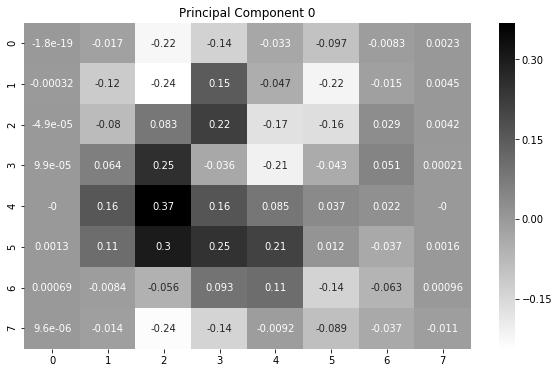

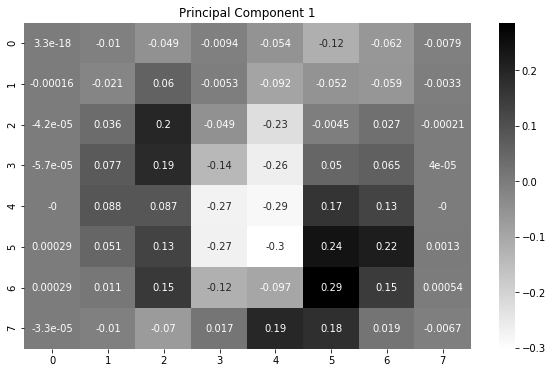

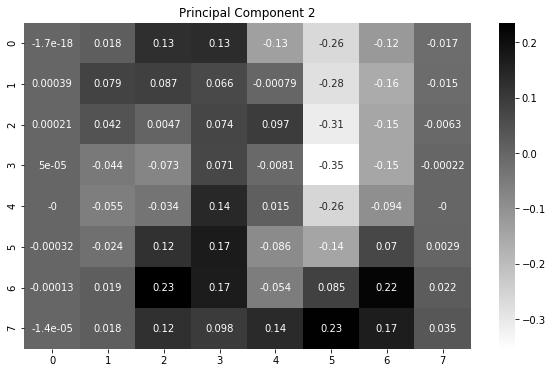

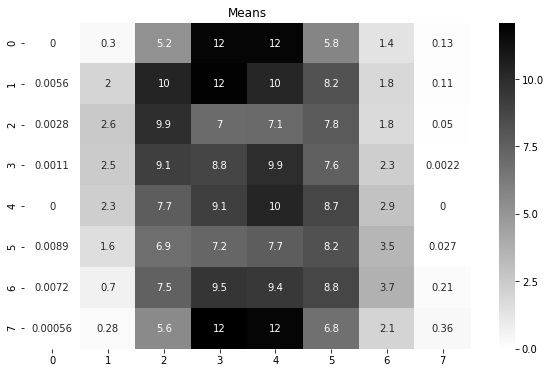

In [6]:
#(a) # Your Code goes here:
for i in range(0, 3):
    plt9 = plt.figure(figsize=(10, 6))
    plt9 = sns.heatmap(data=pca.components_[i].reshape(8, 8), annot=True, cmap="binary")
    plt9.set_title('Principal Component {}'.format(i))
    plt.show()

plt10 = plt.figure(figsize=(10, 6))
plt10 = sns.heatmap(data=pca.mean_.reshape(8, 8), annot=True, cmap="binary")
plt10.set_title('Means')
plt.show()

(b) ***Your answer goes here:***
<br> Principal components show the directions of the vectors composing the new vector space, where the information of the data is mostly preserved. The signs of the values in the eigenvector indicate the relationship between the original attributes and the principal component, and the magnitudes of the values indicate the strength of that relationship. The pixels coloured black and white are the main contributors in that principal component and this shows that for this data, after applying PCA, we use combination of pixels as features instead of individual pixels as features.
<br> The mean value shows how frequently a pixel is written on, and from the graph we could see that the pixels coloured grey (with values lying in the middle of the range, indicating neither too frequent nor too seldom) are the main contributors for the three principal components drawn above, complying with the intuition of PCA: achieving greatest variance.

### ========== Question 2.3 --- [14 marks] ==========

We now want to explore what these principal components (eigen-vectors) capture about the data. To do this, we will first project the data onto the PCA space, and then reconstruct it using successively more dimensions (eigen-vectors). To save us time, we will do this for the first image (`digits.data[0,:]`) which should itself be a 0.

&nbsp;&nbsp;**(a)** [Code] Let us first verify that PCA is indeed an invertible transform. Using heatmaps similarly to the previous question, display the original digit. Using the PCA object's `transform` method, project this into the PCA space, and then reconstruct the original digit by multiplying each dimension with the projection value. Show the reconstructed digit, and also print the Mean Absolute Differences (MAD) between the two. *Tip: the MAD should be 0 - if it is not, you may be forgetting to add something...* Label everything appropriately.<br>
&nbsp;&nbsp;&nbsp;*Hint: the PCA `transform` requires a 2D array, with the samples along the rows...*<br>
&nbsp;&nbsp;**(b)** [Code] Now we can analyse the quality of the reconstruction as we include more components. For the same digit, plot the reconstruction with `[0, 1, 2, 5, 15, 30]` components. For each reconstruction, compute and print (within the plot title) the MAD between the reconstruction and the original value.<br>
&nbsp;&nbsp;**(c)** [Text] Comment on the observations in the figures. How many components does it take to reconstruct the digit in a way that it is recogniseable?

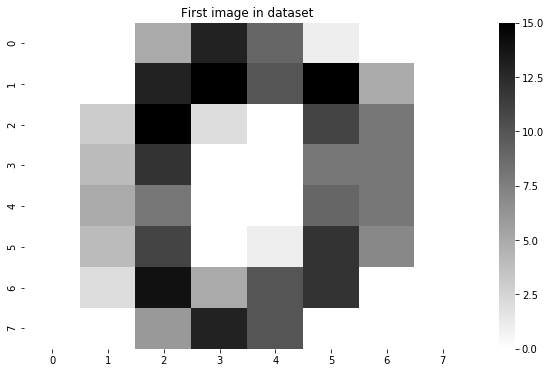

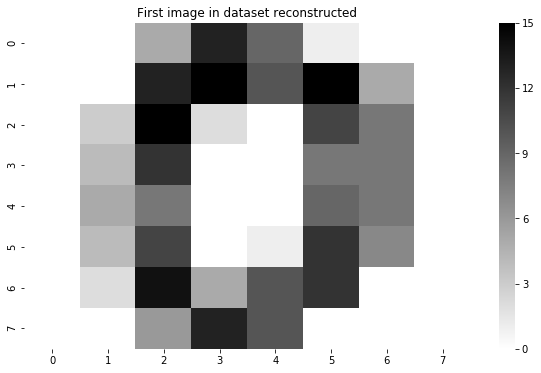

Mean Absolute Difference: 0.0000000000


In [7]:
#(a) # Your Code goes here:
def mad(a, b):
    return np.mean(np.absolute(a - b))

first_image = digits.data[0, :].reshape(1, -1)

plt11 = plt.figure(figsize=(10, 6))
plt11 = sns.heatmap(data=first_image.reshape(8, 8), annot=False, cmap="binary")
plt11.set_title('First image in dataset')
plt.show()

projection = pca.transform(first_image)
first_image_re = np.dot(projection, pca.components_) + pca.mean_

plt12 = plt.figure(figsize=(10, 6))
plt12 = sns.heatmap(data=first_image_re.reshape(8, 8), annot=False, cmap="binary")
plt12.set_title('First image in dataset reconstructed')
plt.show()

print("Mean Absolute Difference: {:.10f}".format(mad(first_image_re, first_image)))

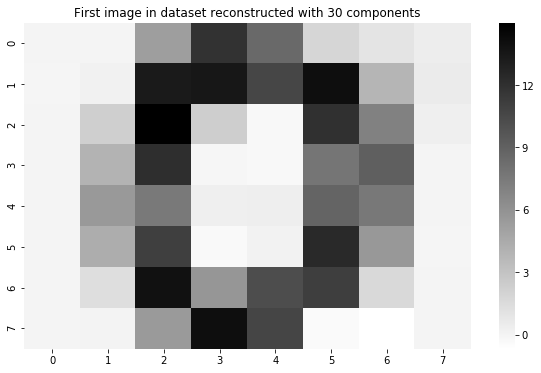

Mean Absolute Difference: 0.4445856240868532


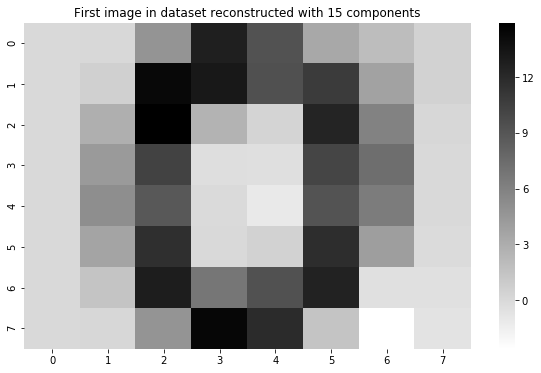

Mean Absolute Difference: 0.7852289291538717


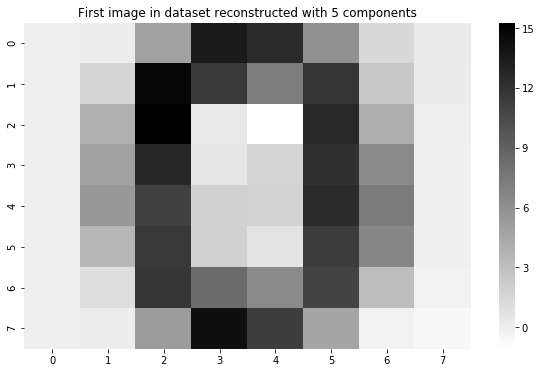

Mean Absolute Difference: 1.3177515426800381


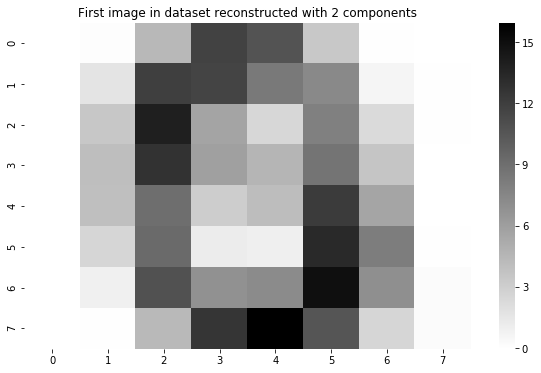

Mean Absolute Difference: 1.8921967216247915


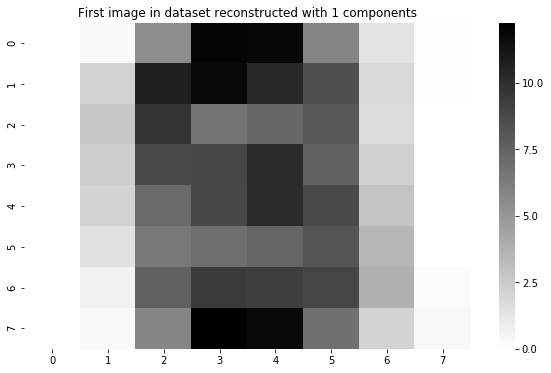

Mean Absolute Difference: 2.7167623365180997


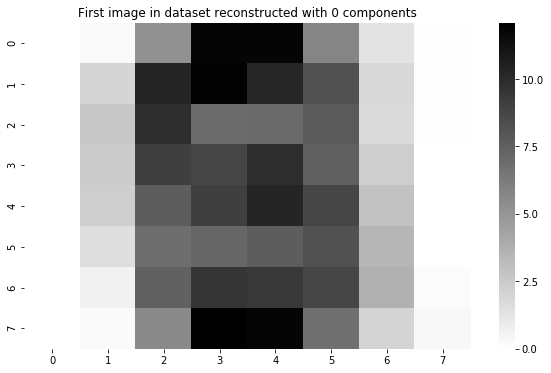

Mean Absolute Difference: 2.7091506677796326


In [8]:
#(b) # Your Code goes here:
comp_num = [30, 15, 5, 2, 1, 0] # [0, 1, 2, 5, 15, 30]
for co in comp_num:
    first_image_re1 = np.dot(projection[:,:co], pca.components_[:co, :]) + pca.mean_
    plt12 = plt.figure(figsize=(10, 6))
    plt12 = sns.heatmap(data=first_image_re1.reshape(8, 8), annot=False, cmap="binary")
    plt12.set_title('First image in dataset reconstructed with {} components'.format(co))
    plt.show()
    print("Mean Absolute Difference: {:}".format(mad(first_image_re1, first_image)))

(c) ***Your answer goes here:***
<br> As the number of components used to reconstruct decreases, the mean absolute difference increases, indicating more loss in information and less clearer the image becomes. When the number of components comes to 0 and 1, the image reconstructed is just like the mean of the original dataset, which cannot be recognised as a digit 0. Having at least 2 components for reconstructing would make the image recognisable. However, since the image reconstructed with 2 components is a bit vague, reconstructing with 5 components would be recommended.

### ========== Question 2.4 --- (LEVEL 11) --- [18 marks] ==========

We will now investigate the effect PCA has on classification performance. Specifically we want to analyse whether the PCA transformation improves the performance of (i) an SVM and (ii) a Naive-Bayes classifier. We will use **5-Fold Cross-Validation** to evaluate our models using the mean accuracy provided by the `score` method of the classifiers in SKLearn. 

*N.B.: To ensure repeatability, set the `random_state=0` where applicable, and use the same KFold object (`shuffle=True`) throughout.*

&nbsp;&nbsp;**(a)** [Code] Train an SVM classifier ([`SVC`](http://scikit-learn.org/0.19/modules/generated/sklearn.svm.SVC.html)) with a linear kernel (keep all other parameters at defaults), first on the raw digit data, and then on the PCA-transformed data, **keeping all components**. Report the mean accuracy over folds in each case.<br>
&nbsp;&nbsp;**(b)** [Code] Now train a `NaiveBayes` classifier with default parameters in a similar manner (on raw and PCA-transformed data). Think carefully, and explain using programming comments, about which type of `NaiveBayes` implementation is applicable in this scenario, keeping in mind that we should use the same type for the Raw and PCA training. Again report the fold-averaged accuracy `score`.<br>
&nbsp;&nbsp;**(c)** [Text] What effect did PCA have on each of these classifiers? By referring to the theory behind each classifier type, explain why this is.

In [9]:
#(a) # Your Code goes here:

In [10]:
#(b) # Your Code goes here:

(c) ***Your answer goes here:***